In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

### Ex 2.5

Case N=5, B=1, K=5

In [47]:
np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5)

array([0, 0, 0, 0, 1])

Expectation of the number of black balls: 1  (N * B/K)

In [2]:
trials = []
for i in range(10000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

0.99199999999999999

Probability distribution of the number of black balls

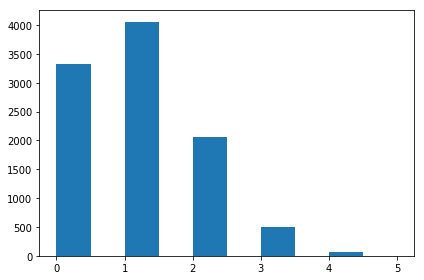

In [3]:
plt.hist(trials)
plt.tight_layout()

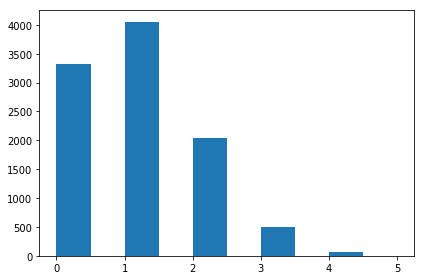

In [4]:
trials_bin = []
for i in range(10000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

Expectation of z

In [5]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [6]:
trials_z = [z(5,1,5) for i in range(10000)]

In [7]:
np.mean(trials_z)

0.99937500000000001

Distribution of z

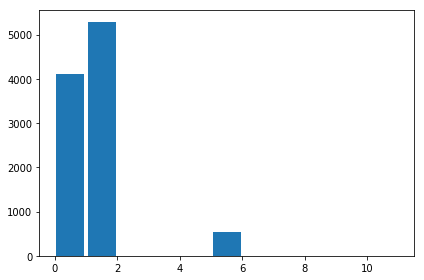

In [16]:
plt.hist(trials_z, bins=range(12), rwidth=0.9)
plt.tight_layout()

Probability of z<1

In [17]:
4000/10000

0.4

### Example 2.6

$P(u | nB, N) = \frac{P(nB | u, N) P(u)}{P(nB | N)}$

Since there are 11 urns,

$P(u) = \frac{1}{11}$

The probability of a black ball is $\frac{u}{10}$ and the binomial coefficient indicates the number of possible combinations of nB back balls.

$P(nB | u,N) = \binom{N}{nB}\frac{u}{10}^{N-nB}{(1-\frac{u}{10})}^{nB}$

The remaining term is just a summation over all possible urns of the probability of nB and the urn in question.

$P(nB | N) = \sum_{u}P(nB,u | N)$

Applying the sum rule,

$\sum_{u}P(nB,u | N) = \sum_{u}P(u)P(nB | u,N) = \frac{1}{11}\sum_{u}P(nB | u,N)$

In [21]:
def prob_nb_given_u_N(nb, u, N):
    return comb(N,nb) * (u/10)**(nb) * (1-u/10)**(N-nb)

In [22]:
def prob_u_given_nb_N(u, nb, N):
    den = 0
    for i in range(11):
        den += prob_nb_given_u_N(nb, i, N)
    
    return prob_nb_given_u_N(nb, u, N) / den

nB = 3, N = 10

In [23]:
for u in range(11):
    print("Urn", u, ":", prob_u_given_nb_N(u, 3, 10))

Urn 0 : 0.0
Urn 1 : 0.0630726246485
Urn 2 : 0.221239787968
Urn 3 : 0.293219859896
Urn 4 : 0.236255574358
Urn 5 : 0.128778505586
Urn 6 : 0.0466677677744
Urn 7 : 0.00989204858457
Urn 8 : 0.000864217921748
Urn 9 : 9.61326393058e-06
Urn 10 : 0.0


In [24]:
probs = [prob_u_given_nb_N(u, 3, 10) for u in range(11)]

<BarContainer object of 11 artists>

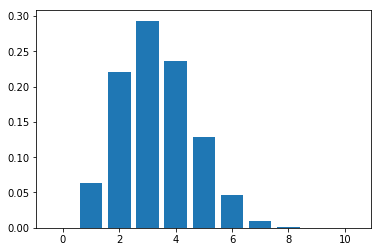

In [26]:
plt.bar(np.arange(0,11), probs)

Given the same case, what is the probability of the next ball being black?

In [ ]:
P = 0
for prob_u in probs:
    P += prob_u * prob_nb_given_u_N(4, )